In [13]:
import openslide
import TissueMask
import TissueSlide
import encodings
import matplotlib.pyplot as plt


Creating TissueSlide and Mask
===

In [14]:
path = r"C:\Users\albao\Downloads\gdc_download_20240503_055336.548442\TCGA-BH-A18M-11A-01-TSA.dcb6f292-963d-4b61-94c3-1bdfde3076ec.svs"
slide = TissueSlide.TissueSlide(path)

dimensions (47990, 17797)
natural mag 20
sample id TCGA-BH-A18M-11A-01-TSA
scale at to downsample 16
path to slide C:\Users\albao\Downloads\gdc_download_20240503_055336.548442\TCGA-BH-A18M-11A-01-TSA.dcb6f292-963d-4b61-94c3-1bdfde3076ec.svs
thumbnail


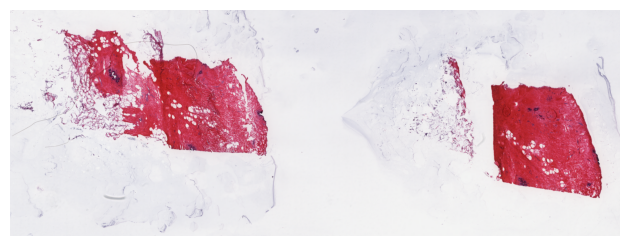

In [18]:
# attributes:
print(f"dimensions {slide.dimensions}")
print(f"natural mag {slide.magnification}")
print(f"sample id {slide.id}")
print(f"scale at to downsample {slide.SCALE}")
print(f"path to slide {slide.path}")

print(f"thumbnail")
plt.imshow(slide.thumbnail)
plt.axis("off")
plt.tight_layout()
plt.show()

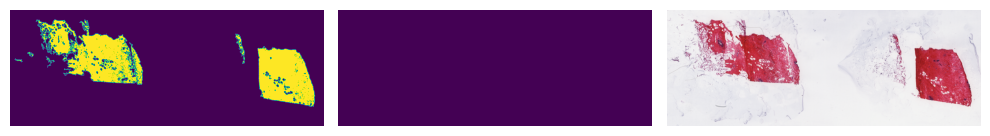

In [19]:
# creating a mask
# Have the option to provide a path to save the tissue mask
# also has option from choosing the following filters: ['red_pen', 'blue_pen',"green_pen", 'black_pen', 'whole_slide']. Default is a mask based on them all
def visualize(img, img2, img3 = None):
    if img3 is not None:
        fig, axes = plt.subplots(1, 3, figsize=(10, 5))
    else:
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Plot the first image
    axes[0].imshow(img)
    axes[0].axis('off')
    
    # Plot the second image
    axes[1].imshow(img2)
    axes[1].axis('off')
    if img3 is not None:
        axes[2].imshow(img3)
        axes[2].axis('off')
        
    plt.tight_layout()
    plt.show()
# if you want to use a result_path you can do
# mask = TissueMask.TissueMask(slide, result_path = " your desired path")

mask = TissueMask.TissueMask(slide)
mask_blue = TissueMask.TissueMask(slide, masks =["blue_pen"])
visualize(mask.mask, mask_blue.mask, mask.thumbnail)


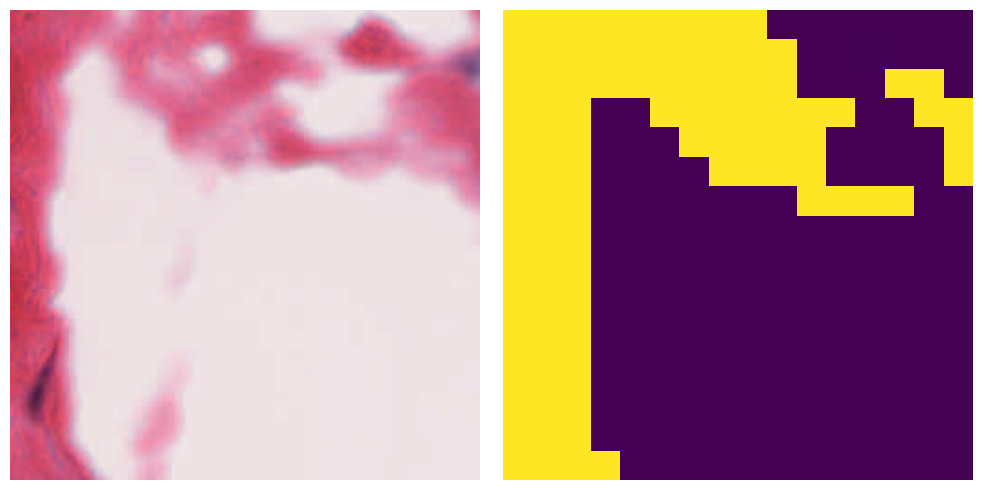

False


In [20]:
# to obtain the coordinates of an image based on og slide:
size = 256
x = 9000
y = 5000
slide_region = slide.slide.read_region((x, y), 0, (size, size))
masked_area = mask.get_region_mask((x, y), (size, size))
visualize(slide_region, masked_area)

# can check if tissue by 
# threshold default at 0.7 but can be changed with threshold = some value
print(mask.is_tissue(masked_area))

Normalizing 
==


C:\Users\albao\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


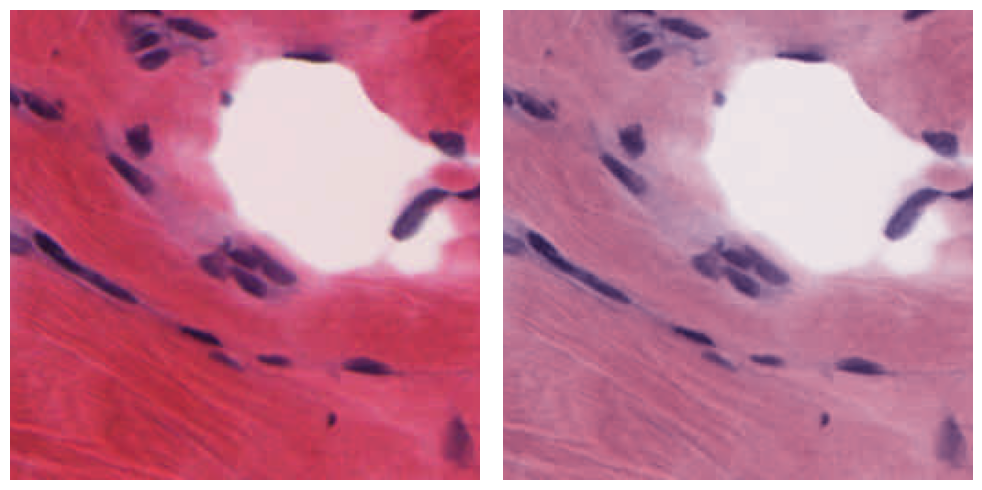

In [21]:
import TileNormalization
import SlidePreprocessing
import numpy as np
size = 256
x = 9900
y = 9000
slide_region = slide.slide.read_region((x, y), 0, (size, size)).convert("RGB")
norm = TileNormalization.normalizeStaining(np.array(slide_region))
visualize(slide_region, norm)


# through SlidePreprocessing
# tile_information = "your path to a csv with some tile information"
# result_path = "your result path"
# normalized = SlidePreprocessing.normalize_tiles(tile_information, result_path)


Tiling
===

In [22]:
import SlidePreprocessing
result_path = "~/desired_path"
# can directly call 
tiles = SlidePreprocessing.tiling(slide, result_path,mask, overlap = 0, desired_size= 256, mag = 20)

# will return the number of tiles and save tiles to result_path + tiles 
# the tile information will be saved to result_path + tile_information.csv 

Tiling slide



KeyboardInterrupt



Blurry Filter
==

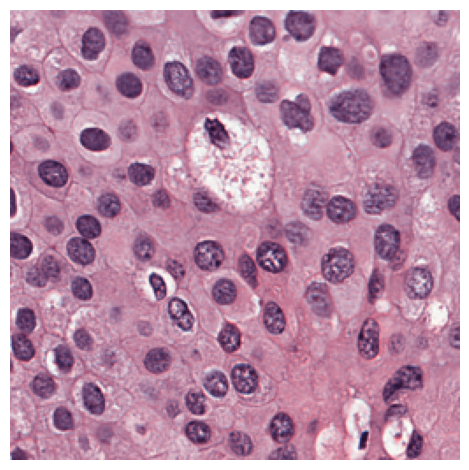

True


In [26]:
import TileQualityFilters
from PIL import Image

# (returns true if not blurry)

# can do it in two ways -> 
# direct tile path (returns true if not blurry)
tile = r"C:\Users\albao\Masters\WSI_test\TCGA-BH-A18M-01Z-00-DX1\normalized_tiles\TCGA-BH-A18M-01Z-00-DX1_tile_w4352_h17152_mag40_size512.png"
plt.imshow(Image.open(tile))
plt.axis("off")
plt.tight_layout()
plt.show()
print(TileQualityFilters.LaplaceFilter(Image.open(tile)))

# # through SlidePreprocessing
# tile_information = "your path to a csv with some tile information"
# blur = SlidePreprocessing.blurry_filter(tile_information, result_path)


Encoding
===

In [ ]:
import SlideEncoding
tile_path= "path to tiles information csv"
result_path = "path where you want to dump the pickled tensors"
SlideEncoding.encode_tiles(slide.id, tile_path, result_path)


In [9]:
# example of then opening these pickled files:
import pickle
import numpy as np
import torch
import os
# the keys are just the path to that particular tile, values are the feature tensors

# provide directory with tensors 
directory = r"C:\Users\albao\Masters\WSI_proper\encoded"
total_data = []
for patient in os.listdir(directory):
    patient_path = os.path.join(directory, patient)
    with open(patient_path, 'rb') as f:
        data = pickle.load(f)
    values = []
    for tile in list(data.values()):
        values.append(tile.squeeze())
    total_data.append(torch.stack(values))
    for item in total_data:
        print(item.shape)
# first dimension is the number of tiles in that sample

torch.Size([7742, 2048])
torch.Size([7742, 2048])
torch.Size([4236, 2048])
torch.Size([7742, 2048])
torch.Size([4236, 2048])
torch.Size([10617, 2048])
torch.Size([7742, 2048])
torch.Size([4236, 2048])
torch.Size([10617, 2048])
torch.Size([7143, 2048])
torch.Size([7742, 2048])
torch.Size([4236, 2048])
torch.Size([10617, 2048])
torch.Size([7143, 2048])
torch.Size([3049, 2048])
torch.Size([7742, 2048])
torch.Size([4236, 2048])
torch.Size([10617, 2048])
torch.Size([7143, 2048])
torch.Size([3049, 2048])
torch.Size([10234, 2048])
torch.Size([7742, 2048])
torch.Size([4236, 2048])
torch.Size([10617, 2048])
torch.Size([7143, 2048])
torch.Size([3049, 2048])
torch.Size([10234, 2048])
torch.Size([4211, 2048])
torch.Size([7742, 2048])
torch.Size([4236, 2048])
torch.Size([10617, 2048])
torch.Size([7143, 2048])
torch.Size([3049, 2048])
torch.Size([10234, 2048])
torch.Size([4211, 2048])
torch.Size([3010, 2048])
torch.Size([7742, 2048])
torch.Size([4236, 2048])
torch.Size([10617, 2048])
torch.Size([714

Recreating slide
==

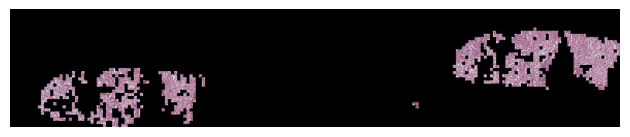

In [5]:
import VisulizationUtils

#provide with tile csv
tile_csv = r"C:\Users\albao\Masters\WSI_proper\TCGA-BH-A1FR-11B-04-TS4\infocus_tile_information.csv"

# can also provide it with out_put file if you want to save it
plt.imshow(VisulizationUtils.SlideReconstruction(tile_csv))
plt.axis('off')
plt.tight_layout()
plt.show()
